## Training Material: Visualizing Preprocessed ALOS-2 Images

This training material guides you through visualizing preprocessed ALOS-2 SAR images using Python.

**I. Reading and Visualizing ALOS-2 Data**

* **A. Setting up the Environment:**

In [1]:
pip install rasterio matplotlib gdal numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


* **B. Loading preprocessed ALOS-2 Data:**

In [6]:
import os
import matplotlib.pyplot as plt
import rasterio

# Folder containing the GeoTIFF images
folder_path = "/home/jovyan/shared/genAI/3_sirin/preprocessed"
preprocessed_images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.tif')]

* **C. Visualizing Multiple Images for Comparison:**

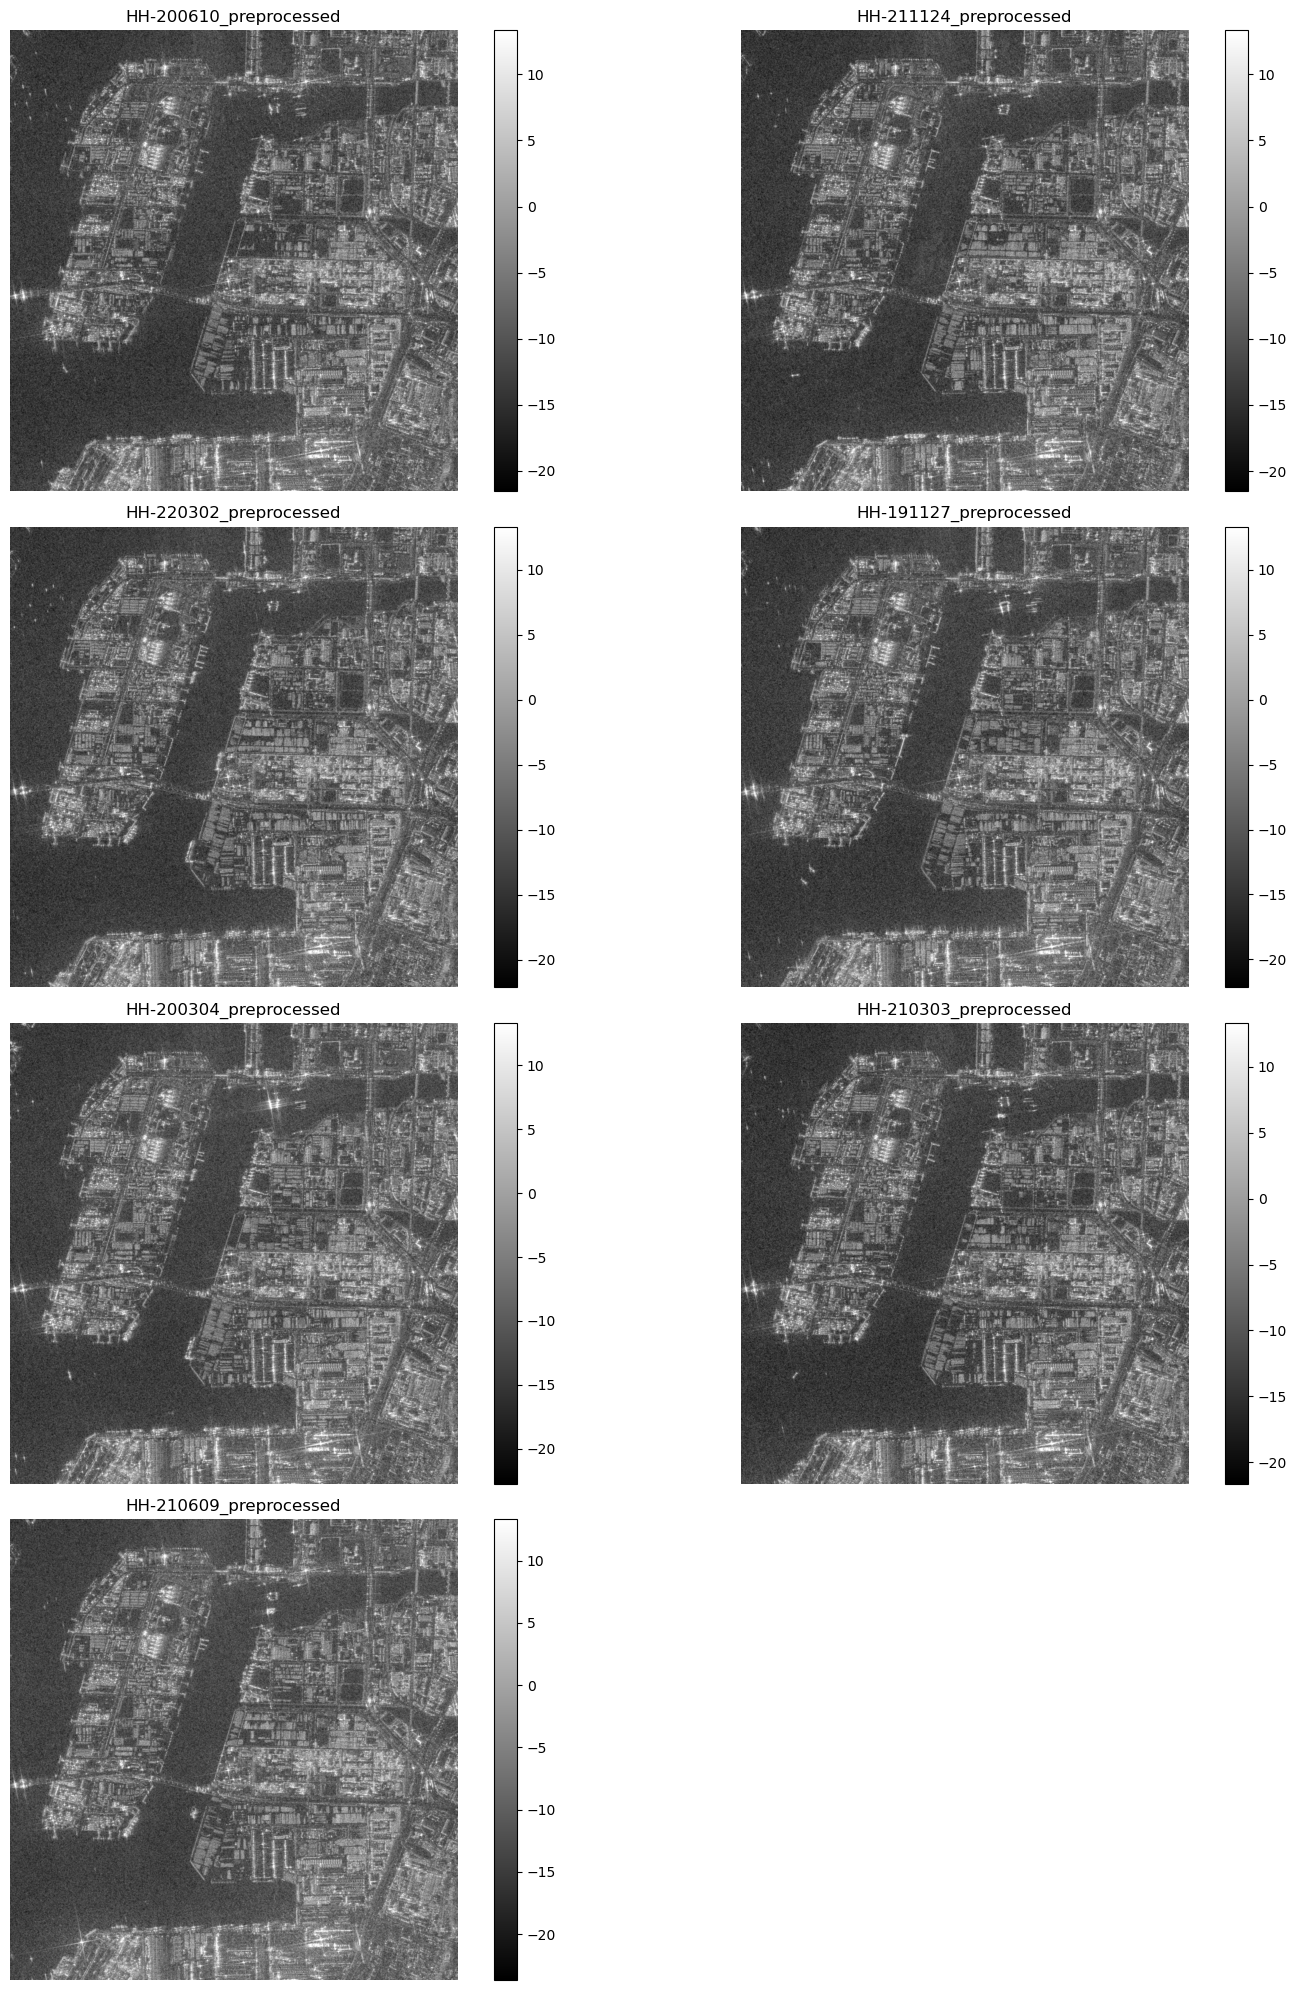

In [7]:
# Choose a color map
color_map = 'gray'  # You can change the color map as needed

# Determine number of rows needed for the subplots
num_images = len(preprocessed_images)
num_columns = 2
num_rows = (num_images + num_columns - 1) // num_columns  # Ceiling division to get rows

# Create a figure with subplots
plt.figure(figsize=(15, num_rows * 5))  # Adjust figure size based on the number of rows

# Loop through each preprocessed file and add it to the subplot.
for i, image_path in enumerate(preprocessed_images):
    # Open the image with rasterio
    with rasterio.open(image_path) as src:
        image_data = src.read(1)  # Read the first band of the raster

    # Create a subplot for each image
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(image_data, cmap=color_map)
    plt.colorbar()
    plt.title(os.path.basename(image_path).replace('.tif', ''))
    plt.axis("off")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
